In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np

import os
import sys
__file__ = './'
sys.path.append(os.path.abspath(os.path.join(os.path.dirname(__file__), '..')))

# os.path.dirname(__file__)获取当前文件的绝对路径
# os.path.join(xx,'..')在后面追加..，相当于进入上一级目录
# os.path.abspath(xx)获取绝对路径
# sys.path.append()将其加入系统路径当中

import MSA
import LINK

In [7]:
# read data
my_link = pd.read_excel(r'D:\004_PhD_Dissertation\Paper_Code\Part3\input_network\small_net.xlsx', sheet_name='link_info')
my_link['I'] = 0
my_node = pd.read_excel(r'D:\004_PhD_Dissertation\Paper_Code\Part3\input_network\small_net.xlsx', sheet_name='node_info')
my_link['name'] = my_link['from'].astype('str') +'-'+ my_link['to'].astype('str')
my_demand = pd.read_excel(r'D:\004_PhD_Dissertation\Paper_Code\Part3\input_network\small_net.xlsx', sheet_name='demand_info')
print(my_demand)

# set parameter
origin_zone = ['r1']
destination_zone = ['s1']
theta_1 = 1# path
theta_2 = 0.5 # mode
miu_in = 25
miu_out = 50
lamda_0_hailing = 2 #2 RMB/minute
lamda_0_PR = 30 # RMB
lamda_0_transit = 5
N_hailing = 500
lamda_0_auto = LINK.compute_lamda_0_auto(fuel_consumption=8.5)

def bus_frequency(x, f_bus):
    if x['attribute'] in ['P&R','R&T']:
        return f_bus
    elif x['attribute'] in ['transit','board_transit']:
        return f_bus
    else:
        return 0

frequency =np.arange(2, 10.1, 0.5)
df = []
for f_bus in frequency:
    my_link['f_bus'] = my_link.apply(bus_frequency, f_bus=f_bus, axis=1)
    result = MSA.assignment(my_link= my_link, my_node= my_node, my_demand= my_demand,
                        origin_zone= origin_zone, destination_zone= destination_zone,
                        miu_in= miu_in, miu_out= miu_out,
                        lamda_0_auto= lamda_0_auto,
                        lamda_0_hailing= lamda_0_hailing,
                        lamda_0_transit= lamda_0_transit,
                        lamda_0_PR= lamda_0_PR,
                        theta_1= theta_1, theta_2= theta_2,
                        N_hailing= N_hailing, A=2, maximum_iter=300)
    df.append(result)

# path_flow
path_1_flow = [df[i][2].tail(4).iloc[0]['path_flow'] for i in range(len(df))]
path_2_flow = [df[i][2].tail(4).iloc[1]['path_flow'] for i in range(len(df))]
path_3_flow = [df[i][2].tail(4).iloc[2]['path_flow'] for i in range(len(df))]
path_4_flow = [df[i][2].tail(4).iloc[3]['path_flow'] for i in range(len(df))]

# path_duration
path_1_duration = [df[i][2].tail(4).iloc[0]['path_duration'] for i in range(len(df))]
path_2_duration = [df[i][2].tail(4).iloc[1]['path_duration'] for i in range(len(df))]
path_3_duration = [df[i][2].tail(4).iloc[2]['path_duration'] for i in range(len(df))]
path_4_duration = [df[i][2].tail(4).iloc[3]['path_duration'] for i in range(len(df))]

# path_cost
path_1_cost = [abs(df[i][2].tail(4).iloc[0]['path_cost']) for i in range(len(df))]
path_2_cost = [abs(df[i][2].tail(4).iloc[1]['path_cost']) for i in range(len(df))]
path_3_cost = [abs(df[i][2].tail(4).iloc[2]['path_cost']) for i in range(len(df))]
path_4_cost = [abs(df[i][2].tail(4).iloc[3]['path_cost']) for i in range(len(df))]

# convert to dataframe
dfx = pd.DataFrame({
        'frequency': frequency,
        'path_1_flow': path_1_flow,
        'path_2_flow': path_2_flow,
        'path_3_flow': path_3_flow,
        'path_4_flow': path_4_flow,
        'path_1_cost': path_1_cost,
        'path_2_cost': path_2_cost,
        'path_3_cost': path_3_cost,
        'path_4_cost': path_4_cost,
        'path_1_duration': path_1_duration,
        'path_2_duration': path_2_duration,
        'path_3_duration': path_3_duration,
        'path_4_duration': path_4_duration,})

dfx['total_cost'] = dfx['path_1_flow'] * dfx['path_1_cost'] + dfx['path_2_flow'] * dfx['path_2_cost'] + dfx['path_3_flow'] * dfx['path_3_cost'] + dfx['path_4_flow'] * dfx['path_4_cost']

  OD_pair  demand
0   r1-s1    1000
0.6517
['path-1', 'path-2', 'path-3', 'path-4']
['auto', 'P&R', 'transit', 'R&T']
Iteration = 1, gap = 1.3403711843802788,
the number of idle_hailing:500.0
Iteration = 2, gap = 11.191575640936788,
the number of idle_hailing:375.2398835805664
Iteration = 3, gap = 5.002980605531431,
the number of idle_hailing:368.81159397490393
Iteration = 4, gap = 3.161746505108372,
the number of idle_hailing:368.6109763225953
Iteration = 5, gap = 2.2910575158592903,
the number of idle_hailing:368.7354492454881
Iteration = 6, gap = 1.7874126027964183,
the number of idle_hailing:368.8335037310328
Iteration = 7, gap = 1.4605660829734044,
the number of idle_hailing:368.9026131958721
Iteration = 8, gap = 1.2319922793172444,
the number of idle_hailing:368.9531913742473
Iteration = 9, gap = 1.0635137441977123,
the number of idle_hailing:368.99169512884725
Iteration = 10, gap = 0.9343861036633535,
the number of idle_hailing:369.02194144432946
Iteration = 11, gap = 0.83238825

In [8]:
dfx

,frequency,path_1_flow,path_2_flow,path_3_flow,path_4_flow,path_1_cost,path_2_cost,path_3_cost,path_4_cost,path_1_duration,path_2_duration,path_3_duration,path_4_duration,total_cost
0,2.0,269.241653,239.946846,247.293318,243.518183,114.680579,307.829444,219.469412,255.666093,37.375122,442.211682,463.298017,444.670245,221272.154550
1,2.5,262.783454,238.664408,253.185369,245.366769,111.011338,233.611929,145.060554,183.736636,36.179293,274.798321,290.716758,278.021412,166736.869998
2,3.0,258.000383,237.896575,257.436891,246.666152,108.474989,198.294319,110.132002,149.995877,35.352681,197.281135,210.888233,201.030785,140511.073962
3,3.5,254.808976,237.459237,260.222849,247.508938,106.861157,179.064932,91.259111,131.769135,34.826723,156.051049,168.450439,160.135416,126111.548881
4,4.0,252.683797,237.200667,262.053749,248.061786,105.820006,167.579472,80.040216,120.930401,34.487406,131.959600,143.667946,136.259835,117462.013552
5,4.5,251.232246,237.039059,263.292164,248.436530,105.123925,160.221859,72.877819,114.005149,34.260548,116.857637,128.144860,121.302178,111900.560810
6,5.0,250.208126,236.932482,264.159428,248.699965,104.640082,155.239905,68.041332,109.323716,34.102861,106.852614,117.870626,111.397456,108125.738410
7,5.5,249.462599,236.858895,264.786960,248.891545,104.291633,151.711331,64.623764,106.011556,33.989299,99.920204,110.759371,104.537277,105447.950048
8,6.0,248.903633,236.806025,265.255114,249.035228,104.032474,149.117382,62.116714,103.578552,33.904838,94.934940,105.651541,99.605731,103477.439441
9,6.5,248.473781,236.766773,265.613563,249.145882,103.834406,147.150230,60.219064,101.734393,33.840286,91.236036,101.866414,95.947880,101982.118228


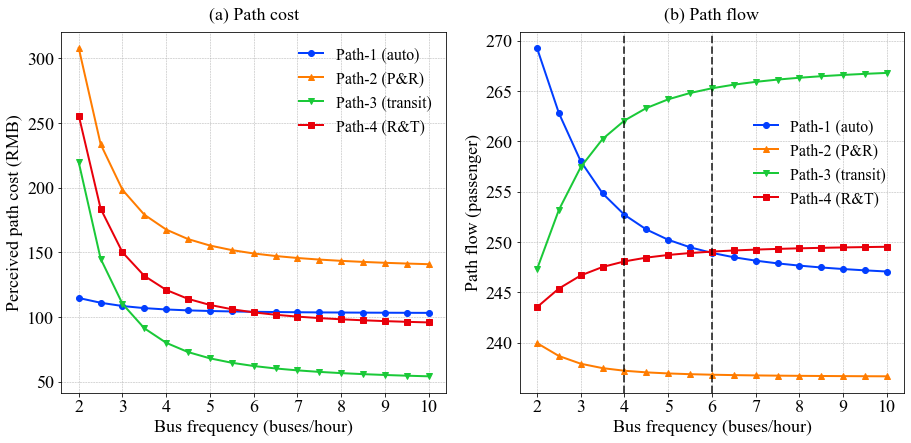

In [23]:
import seaborn as sns
sns.set_palette("bright", 10)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 18

fig = plt.figure(figsize=(13,6.5))

ax = plt.subplot(1,2,1)
ax.grid(ls = '--', lw = 0.5, zorder = 0)
ax.plot(dfx['frequency'], dfx['path_1_cost'], '-', lw=2, marker='o',label='Path-1 (auto)')
ax.plot(dfx['frequency'], dfx['path_2_cost'], '-', lw=2, marker='^',label='Path-2 (P&R)')
ax.plot(dfx['frequency'], dfx['path_3_cost'], '-', lw=2, marker='v',label='Path-3 (transit)')
ax.plot(dfx['frequency'], dfx['path_4_cost'], '-', lw=2, marker='s',label='Path-4 (R&T)')
ax.set_xlabel('Bus frequency (buses/hour)')
ax.set_ylabel('Perceived path cost (RMB)')
ax.legend(loc='best', fontsize=16, frameon=False, handlelength=1.5) # ,bbox_to_anchor = (1,0.4)
ax.set_title('(a) Path cost', fontsize=18, loc='center', y=1.02)
ax.set_xticks(np.arange(2,11,1))
# ax.axvline(x=4, lw=2, ls='--', c='black', alpha=0.7)
# ax.axvline(x=6, lw=2, ls='--', c='black', alpha=0.7)

ax = plt.subplot(1,2,2)
ax.grid(ls = '--', lw = 0.5, zorder = 0)
ax.plot(dfx['frequency'], dfx['path_1_flow'], '-', lw=2, marker='o',label='Path-1 (auto)')
ax.plot(dfx['frequency'], dfx['path_2_flow'], '-', lw=2, marker='^',label='Path-2 (P&R)')
ax.plot(dfx['frequency'], dfx['path_3_flow'], '-', lw=2, marker='v',label='Path-3 (transit)')
ax.plot(dfx['frequency'], dfx['path_4_flow'], '-', lw=2, marker='s',label='Path-4 (R&T)')
ax.set_xlabel('Bus frequency (buses/hour)')
ax.set_ylabel('Path flow (passenger)')
ax.legend(loc='best', fontsize=16, frameon=False, handlelength=1.5, bbox_to_anchor = (0.99,0.8) ) #, bbox_to_anchor = (1,0.9),
ax.set_title('(b) Path flow', fontsize=18, loc='center', y=1.02)
ax.set_xticks(np.arange(2,11,1))
ax.axvline(x=4, lw=2, ls='--', c='black', alpha=0.7)
ax.axvline(x=6, lw=2, ls='--', c='black', alpha=0.7)

plt.tight_layout()
plt.show()